## Descargue las bases de datos

In [107]:
!wget -q https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/common_player_info.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/draft_combine_stats.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/draft_history.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/game.csv



1. Tabla games_playoffs_cleaned (Juegos de los Playoffs Filtrados)
Descripción: Esta tabla contiene los datos de los partidos de los Playoffs, filtrados por las temporadas entre 1984 y 2003. Incluye información sobre los equipos, sus resultados, y diversas estadísticas del juego tanto para los equipos locales como los visitantes.

Columnas clave:

game_id: Identificador único del partido.
team_id_home / team_id_away: Identificadores únicos de los equipos que jugaron en casa y fuera.
pts_home / pts_away: Puntos anotados por el equipo local y visitante en cada partido.
wl_home / wl_away: Indicador de victoria o derrota del equipo (W = Ganado, L = Perdido).
season_id: Identificador de la temporada en la que ocurrió el partido.
reb_home / reb_away, ast_home / ast_away, etc.: Estadísticas adicionales como rebotes, asistencias, robos, bloqueos, etc., tanto para los equipos locales como visitantes.
Importancia: Esta tabla es fundamental para analizar el rendimiento de los equipos en los Playoffs a lo largo de las temporadas. Nos permite comparar equipos, analizar victorias y derrotas, y observar tendencias generales en los partidos.

2. Tabla player_game_stats (Estadísticas de Jugadores por Partido)
Descripción: Esta tabla resulta de la combinación (join) entre las estadísticas de los jugadores y los partidos que jugaron en los Playoffs. Contiene información sobre los jugadores individuales y su rendimiento en cada uno de los juegos.

Columnas clave:

person_id: Identificador único de cada jugador.
team_id_home: Identificador del equipo del jugador (coincide con el equipo que jugó en casa en el partido).
pts_home: Puntos anotados por el jugador en el partido.
reb_home, ast_home, stl_home, blk_home, etc.: Otras estadísticas del jugador en el partido, como rebotes, asistencias, robos, bloqueos, etc.
position: La posición del jugador (base, alero, pívot, etc.).
season_exp: Número de años que el jugador ha jugado en la NBA.
from_year / to_year: Años en los que el jugador comenzó y terminó su carrera.
Importancia: Esta tabla es esencial para analizar el rendimiento de los jugadores, identificando quiénes han sido los más destacados en los Playoffs. Nos permite comparar el desempeño de jugadores por puntos, rebotes, asistencias, etc., y estudiar su evolución a lo largo del tiempo.

3. Tabla players_combined_cleaned (Jugadores Combinada y Limpia)
Descripción: Esta tabla contiene la información combinada de los jugadores que han jugado en los equipos durante los Playoffs. Ha sido filtrada y limpia para eliminar columnas irrelevantes, conservando solo la información clave que necesitamos para el análisis.

Columnas clave:

person_id: Identificador único del jugador (clave para combinar con otras tablas).
first_name / last_name: Nombres y apellidos del jugador.
team_id: Identificador del equipo al que perteneció el jugador.
position: Posición del jugador (base, alero, pívot, etc.).
height / weight: Altura y peso del jugador.
season_exp: Número de años de experiencia del jugador en la NBA.
from_year / to_year: Años en los que el jugador comenzó y terminó su carrera

Importe las liberrias

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Caraga las tablas:

```
'common_player_info.csv'
'draft_combine_stats.csv'
'game.csv'
```
 y llamelas: `players_df, combine_stats_df y games_df`


In [109]:
players_df= pd.read_csv('common_player_info.csv')
combine_stats_df= pd.read_csv('draft_combine_stats.csv')
games_df= pd.read_csv('game.csv')
players_df.head()

,person_id,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,...,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,HISTADD_alaa_abdelnaby,1990.0,1994.0,N,Y,Y,1990,1,25,N
1,76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16 00:00:00,UCLA,USA,...,HISTADD_kareem_abdul-jabbar,1969.0,1988.0,N,Y,Y,1969,1,1,Y
2,1505,Tariq,Abdul-Wahad,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",T. Abdul-Wahad,tariq-abdul-wahad,1974-11-03 00:00:00,San Jose State,France,...,tariq_abdul-wahad,1997.0,2003.0,N,Y,Y,1997,1,11,N
3,949,Shareef,Abdur-Rahim,Shareef Abdur-Rahim,"Abdur-Rahim, Shareef",S. Abdur-Rahim,shareef-abdur-rahim,1976-12-11 00:00:00,California,USA,...,shareef_abdur-rahim,1996.0,2007.0,N,Y,Y,1996,1,3,N
4,76005,Tom,Abernethy,Tom Abernethy,"Abernethy, Tom",T. Abernethy,tom-abernethy,1954-05-06 00:00:00,Indiana,USA,...,HISTADD_tom_abernethy,1976.0,1980.0,N,Y,Y,1976,3,43,N


Paso 1: Filtrar las Temporadas de 1984 a 2003
Dado el formato de las temporadas que mencionas (como 21984, 31984, 41984, etc.), primero identificaremos todas las temporadas que están entre 1984 y 2003. Luego, creamos una condición para filtrar el DataFrame basado en estas temporadas. Utilice algo como

In [110]:
recent_seasons = [21984, 41984, 31984, 21985, 41985, 31985, 21986, 41986, 31986, 21987, 41987, 31987, 21988, 41988, 31988, 21989, 41989, 31989, 21990, 41990, 31990, 21991, 41991, 31991, 21992, 41992, 31992, 21993, 31993, 21994, 41994, 31994, 21995, 31995, 21996, 41996,31996, 21997, 41997, 31997, 21998, 41998, 21999, 31999, 22000, 42000, 32000, 22001, 32001, 22002, 42002, 32002, 22003, 42003,32003]
games_filtered_seasons = games_df[games_df['season_id'].isin(recent_seasons)]
games_filtered_seasons.head()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
18174,21984,1610612765,DET,Detroit Pistons,28400003,1984-10-26 00:00:00,DET vs. BOS,L,240,48.0,...,59.0,34.0,NaN,NaN,NaN,26.0,130.0,7,0,Regular Season
18175,21984,1610612744,GOS,Golden State Warriors,28400006,1984-10-26 00:00:00,GOS vs. PHX,L,240,42.0,...,37.0,32.0,NaN,NaN,NaN,33.0,122.0,8,0,Regular Season
18176,21984,1610612751,NJN,New Jersey Nets,28400004,1984-10-26 00:00:00,NJN vs. ATL,L,240,40.0,...,42.0,21.0,NaN,NaN,NaN,28.0,119.0,15,0,Regular Season
18177,21984,1610612760,SEA,Seattle SuperSonics,28400001,1984-10-26 00:00:00,SEA vs. UTH,W,240,36.0,...,31.0,12.0,NaN,NaN,NaN,29.0,94.0,-8,0,Regular Season
18178,21984,1610612741,CHI,Chicago Bulls,28400005,1984-10-26 00:00:00,CHI vs. WAS,W,240,48.0,...,46.0,24.0,NaN,NaN,NaN,21.0,93.0,-16,0,Regular Season


Paso 2: Filtrar Solo Partidos de Playoffs
Para filtrar los partidos que son solo de Playoffs, asumimos que hay una columna como season_type que indica el tipo de temporada (por ejemplo, Regular o Playoffs).

In [111]:
games_playoffs = games_filtered_seasons[games_filtered_seasons['season_type'] == 'Playoffs']
len(games_playoffs)

1161

Paso 2: Unir Datos Relevantes
Unimos las tablas clave para relacionar la información de los jugadores con los partidos en los que participaron y su rendimiento en el juego. Esto permitirá conectar atributos físicos con el desempeño en partidos.

*  Una players con combinate stats por las columnas person id y player id y llamelo players_combined
*  Una players_combinet con la data filtrada de los juegos en los playoffs games_playoffss y llamelo como player_game_stats


In [112]:
# Merge de las tablas relevantes: jugadores y estadísticas combinadas
players_combined = pd.merge(players_df, combine_stats_df, left_on='person_id', right_on='player_id', how='left')
players_combined.head()

,person_id,first_name_x,last_name_x,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,...,spot_nba_break_right,spot_nba_corner_right,off_drib_fifteen_break_left,off_drib_fifteen_top_key,off_drib_fifteen_break_right,off_drib_college_break_left,off_drib_college_top_key,off_drib_college_break_right,on_move_fifteen,on_move_college
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16 00:00:00,UCLA,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1505,Tariq,Abdul-Wahad,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",T. Abdul-Wahad,tariq-abdul-wahad,1974-11-03 00:00:00,San Jose State,France,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,949,Shareef,Abdur-Rahim,Shareef Abdur-Rahim,"Abdur-Rahim, Shareef",S. Abdur-Rahim,shareef-abdur-rahim,1976-12-11 00:00:00,California,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,76005,Tom,Abernethy,Tom Abernethy,"Abernethy, Tom",T. Abernethy,tom-abernethy,1954-05-06 00:00:00,Indiana,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
# Merge de las tablas relevantes: jugadores y estadísticas combinadas

# Ahora unimos con las estadísticas de partidos para agregar el rendimiento en los juegos

# Mostrar las primeras filas de la unión
player_game_stats = pd.merge(players_combined, games_playoffs, left_on='team_id', right_on='team_id_home',how='left')
player_game_stats.head(10)

,person_id,first_name_x,last_name_x,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,39.0,22.0,4.0,2.0,16.0,23.0,109.0,-13.0,0.0,Playoffs
1,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,37.0,24.0,4.0,1.0,17.0,27.0,113.0,-2.0,0.0,Playoffs
2,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,45.0,33.0,4.0,6.0,17.0,28.0,130.0,4.0,0.0,Playoffs
3,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,51.0,24.0,10.0,7.0,28.0,26.0,107.0,-8.0,0.0,Playoffs
4,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,49.0,21.0,5.0,4.0,13.0,21.0,115.0,11.0,0.0,Playoffs
5,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,48.0,22.0,4.0,3.0,15.0,24.0,116.0,4.0,0.0,Playoffs
6,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,38.0,36.0,13.0,12.0,14.0,27.0,125.0,10.0,0.0,Playoffs
7,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,48.0,23.0,5.0,3.0,24.0,26.0,98.0,-13.0,0.0,Playoffs
8,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,32.0,26.0,5.0,4.0,17.0,23.0,96.0,-12.0,0.0,Playoffs
9,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,45.0,27.0,6.0,9.0,26.0,27.0,114.0,9.0,0.0,Playoffs


##Sección 2: Descriptivas Generales
1. Número de Equipos Participantes en los Playoffs (1984-2003) mire la columna `team_name_home`

In [114]:
# Contar el número de equipos únicos que han participado en los playoffs con la columna team_name_home
games_playoffs['team_name_home'].nunique()

30

2. Número de Jugadores Diferentes que Han Participado en los Playoffs
Para obtener el número de jugadores, usamos la tabla de jugadores (players_combined), que ya hemos combinado con los juego

In [115]:
# Cuenta el número de jugadores únicos que han participado en los playoffs
player_game_stats['person_id'].nunique()

4171

* Hago un grafico de barras con el top 10 de equipos que mas participaron que sea en tonos azules y los xlabels esten el 90

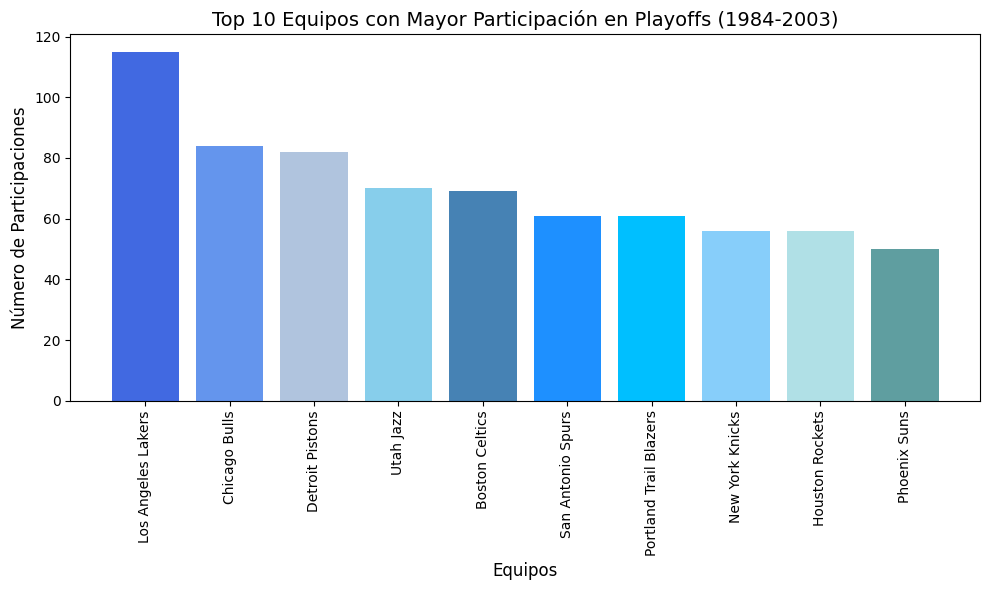

In [116]:
# Contar el número de jugadores únicos por equipo

# Mostrar el resultado

# Gráfica del número de jugadores por equipo

team_counts = games_playoffs['team_name_home'].value_counts()

top_10_teams = team_counts.head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_teams.index, top_10_teams.values, color=['royalblue', 'cornflowerblue', 'lightsteelblue', 'skyblue', 'steelblue', 'dodgerblue', 'deepskyblue', 'lightskyblue', 'powderblue', 'cadetblue'])
plt.xlabel('Equipos', fontsize=12)
plt.ylabel('Número de Participaciones', fontsize=12)
plt.title('Top 10 Equipos con Mayor Participación en Playoffs (1984-2003)', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

3. Equipos que Han Anotado Más Puntos en los Playoffs
Vamos a calcular qué equipos han acumulado más puntos como locales a lo largo de los Playoffs.

In [117]:
# Agrupar por equipo y sumar los puntos anotados como locales

# Mostrar los equipos que más puntos han anotado

import matplotlib.pyplot as plt
import seaborn as sns

team_points = games_playoffs.groupby('team_name_home')['pts_home'].sum().sort_values(ascending=False)
team_points.head(10)

,pts_home
team_name_home,
Los Angeles Lakers,12554.0
Chicago Bulls,8392.0
Detroit Pistons,8127.0
Boston Celtics,7702.0
Utah Jazz,7025.0
Portland Trail Blazers,6496.0
San Antonio Spurs,5965.0
Houston Rockets,5806.0
Phoenix Suns,5435.0


* haga un grafico de barras en azul con estos resultados

<ipython-input-118-af986e897777>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_points.index, y=team_points.values, palette="Blues_r")


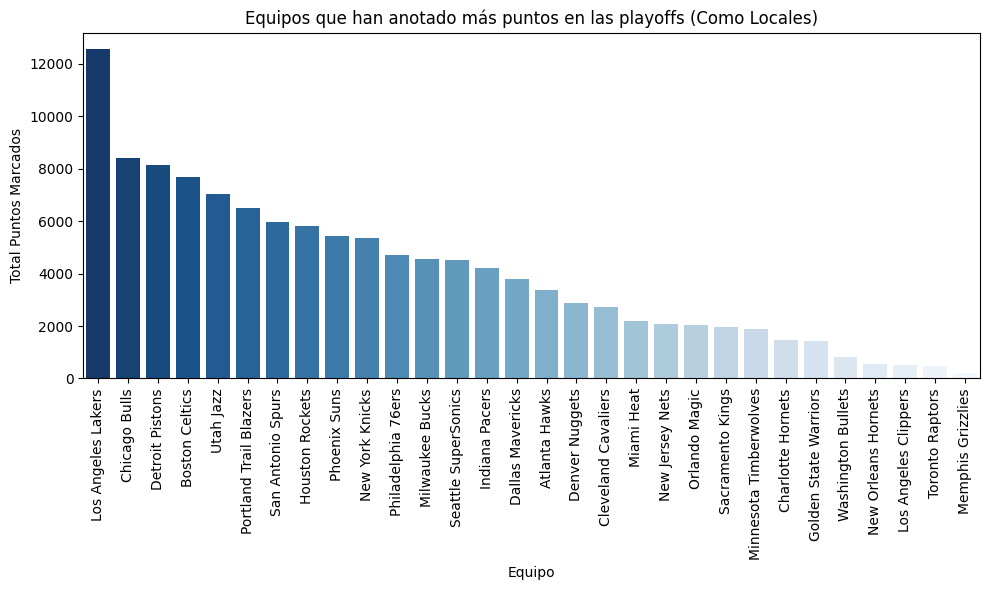

In [118]:
plt.figure(figsize=(10, 6))
sns.barplot(x=team_points.index, y=team_points.values, palette="Blues_r")
plt.title('Equipos que han anotado más puntos en las playoffs (Como Locales)')
plt.xlabel('Equipo')
plt.ylabel('Total Puntos Marcados')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

4. Equipos con Mejor Promedio de Puntos por Partido (en Casa)
Aquí calculamos el promedio de puntos por partido de cada equipo como local.

In [119]:
team_avg_points = games_playoffs.groupby('team_name_home')['pts_home'].mean().sort_values(ascending=False)
team_avg_points.head(10)

,pts_home
team_name_home,
Denver Nuggets,115.200000
Boston Celtics,111.623188
Golden State Warriors,110.000000
Los Angeles Lakers,109.165217
Phoenix Suns,108.700000
Dallas Mavericks,108.200000
Portland Trail Blazers,106.491803
Milwaukee Bucks,105.720930
Seattle SuperSonics,104.813953


Hga un grafico en naranja de estos resultados

<ipython-input-120-7552630396b9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_avg_points.index, y=team_avg_points.values, palette="Oranges_r")  # Use orange color palette


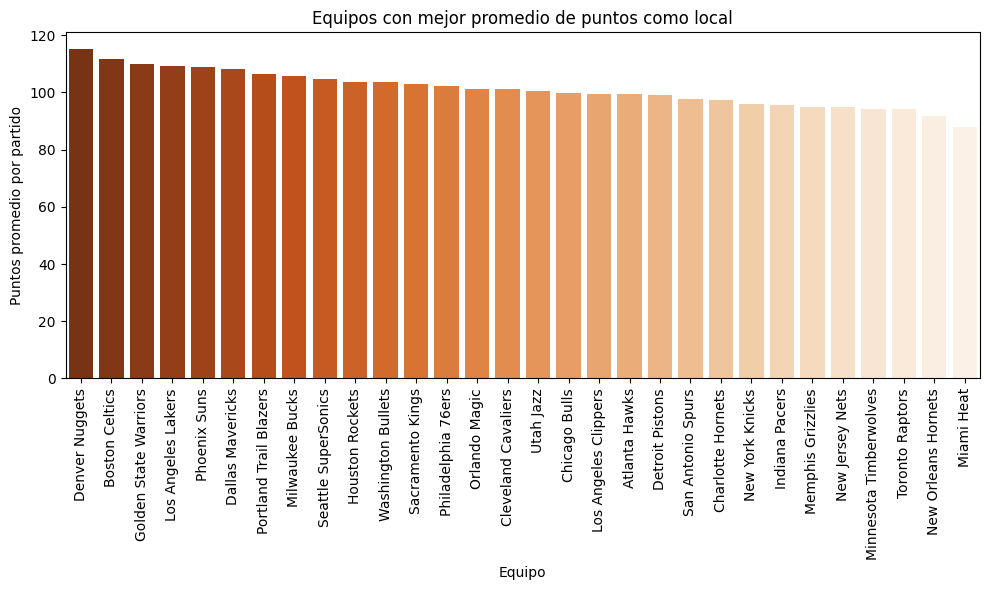

In [120]:
# Gráfica del promedio de puntos en casa por equipo
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average points per game for each team at home
team_avg_points = games_playoffs.groupby('team_name_home')['pts_home'].mean().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x=team_avg_points.index, y=team_avg_points.values, palette="Oranges_r")  # Use orange color palette
plt.title('Equipos con mejor promedio de puntos como local')
plt.xlabel('Equipo')
plt.ylabel('Puntos promedio por partido')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

5. Temporadas con Mayor Cantidad de Puntos Anotados en los Playoffs

Vamos a identificar qué temporadas han tenido el mayor número de puntos totales anotados en los Playoffs. Cree una columna total_points con la suma de pts_home y pts_away, puede usar session_id

In [121]:
games_playoffs['total_points'] = games_playoffs['pts_home'] + games_playoffs['pts_away']
season_total_points = games_playoffs.groupby('season_id')['total_points'].sum()
season_total_points.head(10).sort_values(ascending=False)

<ipython-input-121-ca6d1e8d958b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_playoffs['total_points'] = games_playoffs['pts_home'] + games_playoffs['pts_away']


,total_points
season_id,
41987,16691.0
41986,15678.0
41984,15598.0
41989,15195.0
41992,15127.0
41991,15075.0
41985,15057.0
41994,14492.0
41990,14165.0


In [122]:
# Agrupar por temporada y sumar los puntos anotados

# Mostrar las temporadas con más puntos


* Cree una serie de tiempo con esto:

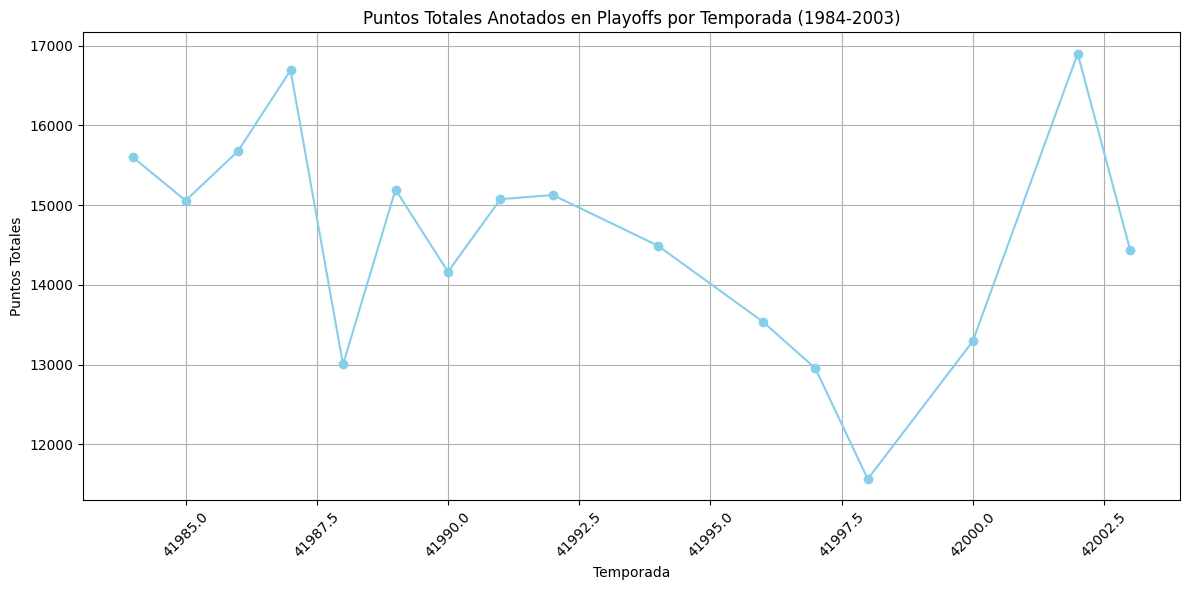

In [123]:
plt.figure(figsize=(12, 6))
season_total_points.plot(kind='line', marker='o', color='skyblue')
plt.xlabel('Temporada')
plt.ylabel('Puntos Totales')
plt.title('Puntos Totales Anotados en Playoffs por Temporada (1984-2003)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

* Hay algun dato interesante en esta graficaa

# SECCION 3

1. Pivot Table: Comparación del Rendimiento por Posición y Equipo
Primero, crearemos una pivot table para comparar el rendimiento promedio de los jugadores en diferentes posiciones dentro de cada equipo, en términos de puntos anotados, rebotes, y asistencias.
 Variables de puntajes: ['pts_home', 'reb_home', 'ast_home'],
Variables utiles: ['team_name_home', 'position_y']


In [124]:
# Crear pivot table para comparar el rendimiento promedio por posición y equipo

# Mostrar el resultado de la pivot table
pivot_table = pd.pivot_table(games_playoffs, values=['pts_home', 'reb_home', 'ast_home'], index=['team_name_home'], columns=['season_type'], aggfunc='mean')

pivot_table

,ast_home,pts_home,reb_home
season_type,Playoffs,Playoffs,Playoffs
team_name_home,,,
Atlanta Hawks,22.882353,99.382353,41.617647
Boston Celtics,26.811594,111.623188,43.652174
Charlotte Hornets,22.866667,97.466667,39.133333
Chicago Bulls,24.547619,99.904762,42.023810
Cleveland Cavaliers,26.629630,101.000000,38.925926
Dallas Mavericks,23.285714,108.200000,45.085714
Denver Nuggets,24.880000,115.200000,45.640000
Detroit Pistons,21.060976,99.109756,45.341463


* Agrupe las posiciones (le pude ser util lo siguiente:

```
player_game_stats['role'] = player_game_stats['position_y'].map({
    'PG': 'Base', 'SG': 'Base', 'PG-SG': 'Base', 'SG-PG': 'Base',
    'SF': 'Ala', 'SF-PF': 'Ala', 'PF-SF': 'Ala',
    'PF': 'Pivote', 'C': 'Pivote', 'PF-C': 'Pivote'
})
```



In [125]:
# Crear una columna que agrupe las posiciones en roles más generales


# Crear pivot table agrupando por los roles

# Graficar por roles agrupados
player_game_stats['position_y'].value_counts()

,count
position_y,
SG,3929
PG,3563
PF,3537
SF,2473
C,1613
PF-C,1047
SG-SF,939
PG-SG,804
SF-PF,719


In [138]:
# Crear una columna que agrupe las posiciones en roles más generales
player_game_stats['role'] = player_game_stats['position_y'].map({
    'PG': 'Base', 'SG': 'Base', 'PG-SG': 'Base', 'SG-PG': 'Base',
    'SF': 'Ala', 'SF-PF': 'Ala', 'PF-SF': 'Ala',
    'PF': 'Pivote', 'C': 'Pivote', 'PF-C': 'Pivote'})

# Crear pivot table agrupando por los roles
pivot_table_roles = pd.pivot_table(player_game_stats,values= 'pts_home', index='team_name_home', columns='role', aggfunc='mean')
pivot_table_roles

role,Ala,Base,Pivote
team_name_home,,,
Atlanta Hawks,99.382353,99.382353,99.382353
Boston Celtics,111.623188,111.623188,111.623188
Charlotte Hornets,97.466667,97.466667,97.466667
Chicago Bulls,99.904762,99.904762,99.904762
Cleveland Cavaliers,101.000000,101.000000,101.000000
Dallas Mavericks,NaN,108.200000,108.200000
Denver Nuggets,115.200000,115.200000,115.200000
Detroit Pistons,99.109756,99.109756,99.109756
Golden State Warriors,110.000000,110.000000,110.000000


In [127]:
player_game_stats.shape

(141124, 136)

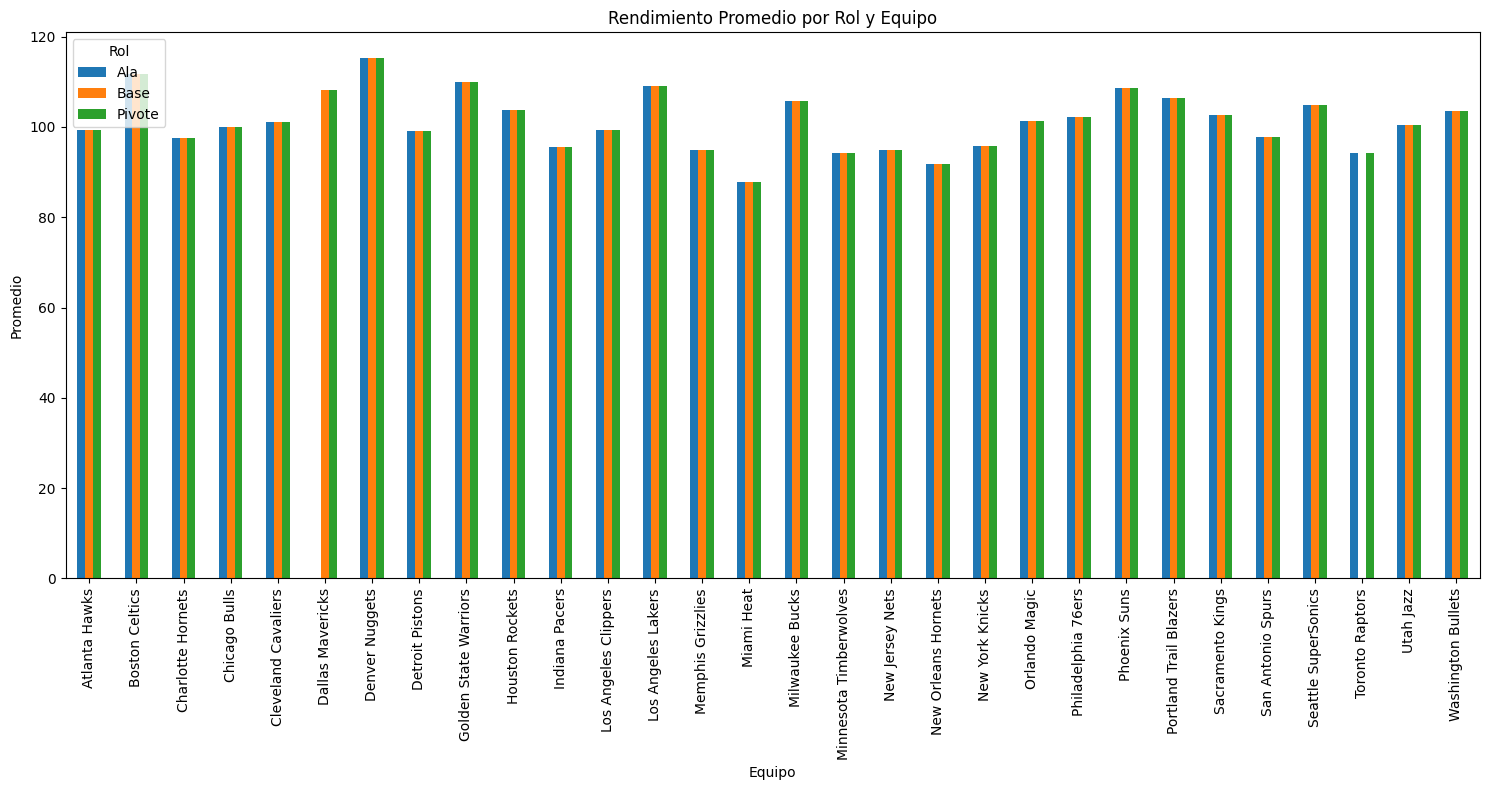

In [128]:
# Graficar por roles agrupados
pivot_table_roles.plot(kind='bar', figsize=(15, 8))
plt.title('Rendimiento Promedio por Rol y Equipo')
plt.xlabel('Equipo')
plt.ylabel('Promedio')
plt.xticks(rotation=90)
plt.legend(title='Rol')
plt.tight_layout()
plt.show()

# Crear una crosstab para analizar victorias por posición de los jugadores
utilice position_y y wl_home

In [139]:
crosstab_result = pd.crosstab(player_game_stats['position_y'], player_game_stats['wl_home'])
crosstab_result

wl_home,L,W
position_y,,
C,546,1055
C-PF,170,271
PF,1192,2321
PF-C,341,699
PF-SF,136,270
PG,1160,2362
PG-SG,243,554
SF,860,1600
SF-PF,256,459


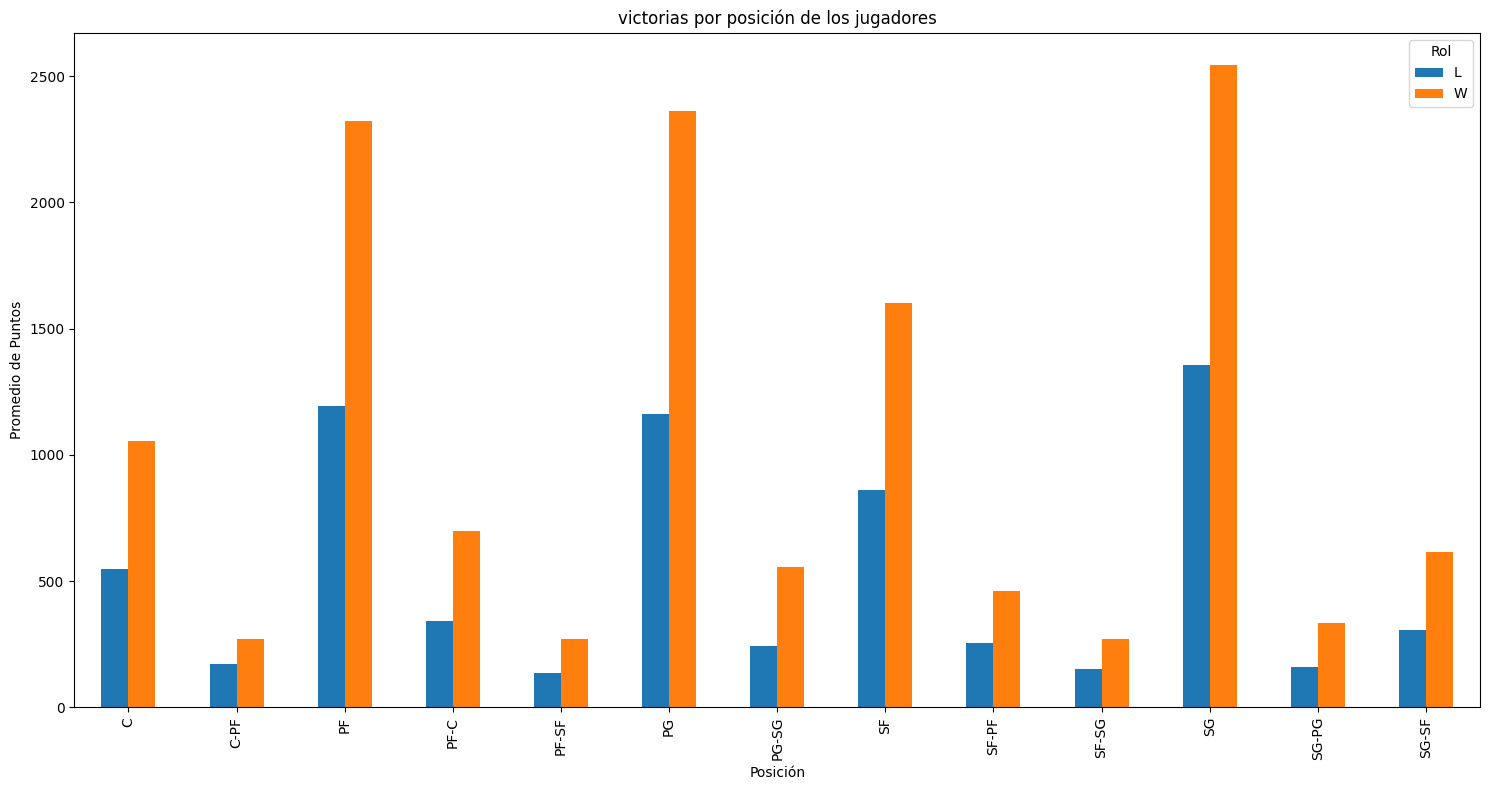

In [142]:
crosstab_result.plot(kind='bar', figsize=(15, 8))
plt.title('victorias por posición de los jugadores')
plt.xlabel('Posición')
plt.ylabel('Promedio de Puntos')
plt.xticks(rotation=90)
plt.legend(title='Rol')
plt.tight_layout()
plt.show()

In [130]:
# Gráfica para visualizar la pivot table


Sección 4: Análisis de Series de Tiempo y Identificación del Mejor Equipo

Vamos a usar series de tiempo para observar cómo los equipos han evolucionado en términos de puntos anotados, victorias, y otros indicadores a lo largo del tiempo.
1. Evolución de los Puntos Anotados por Temporada (Serie de Tiempo)session_id y pts_home
Este análisis mostrará cómo ha cambiado el promedio de puntos anotados en los Playoffs a lo largo de las temporadas.

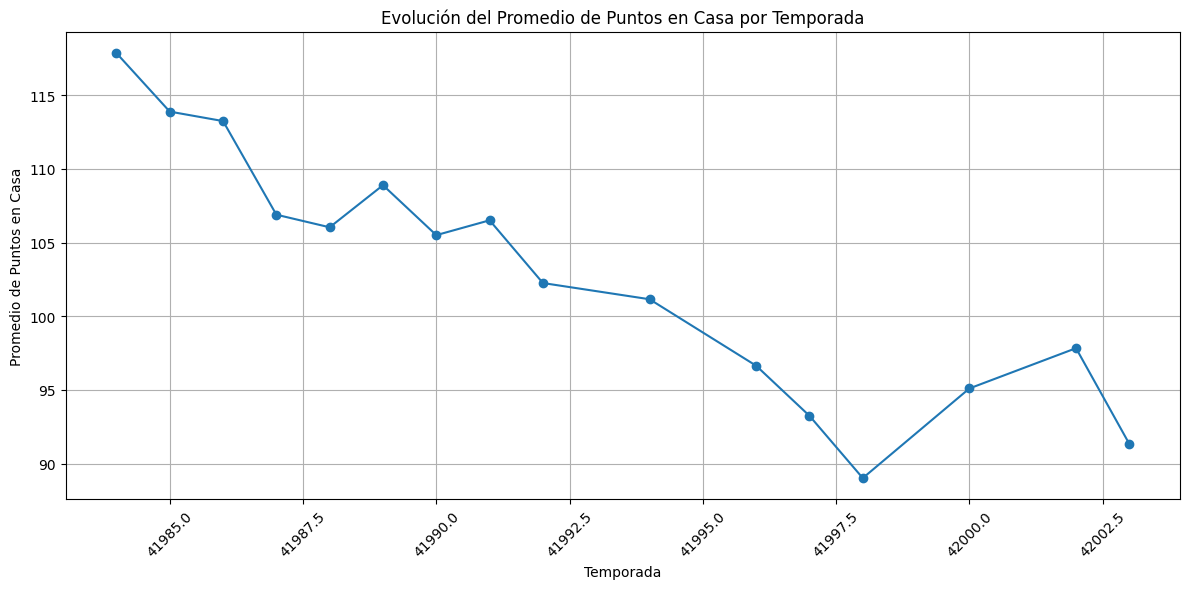

In [144]:
avg_pts_home_by_season = games_playoffs.groupby('season_id')['pts_home'].mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_pts_home_by_season.index, avg_pts_home_by_season.values, marker='o')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Puntos en Casa')
plt.title('Evolución del Promedio de Puntos en Casa por Temporada')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. Evolución del Rendimiento del Mejor Equipo a lo Largo del Tiempo
Primero, identificamos el equipo que ha anotado más puntos en total y luego analizamos cómo ha evolucionado su rendimiento en los Playoffs.

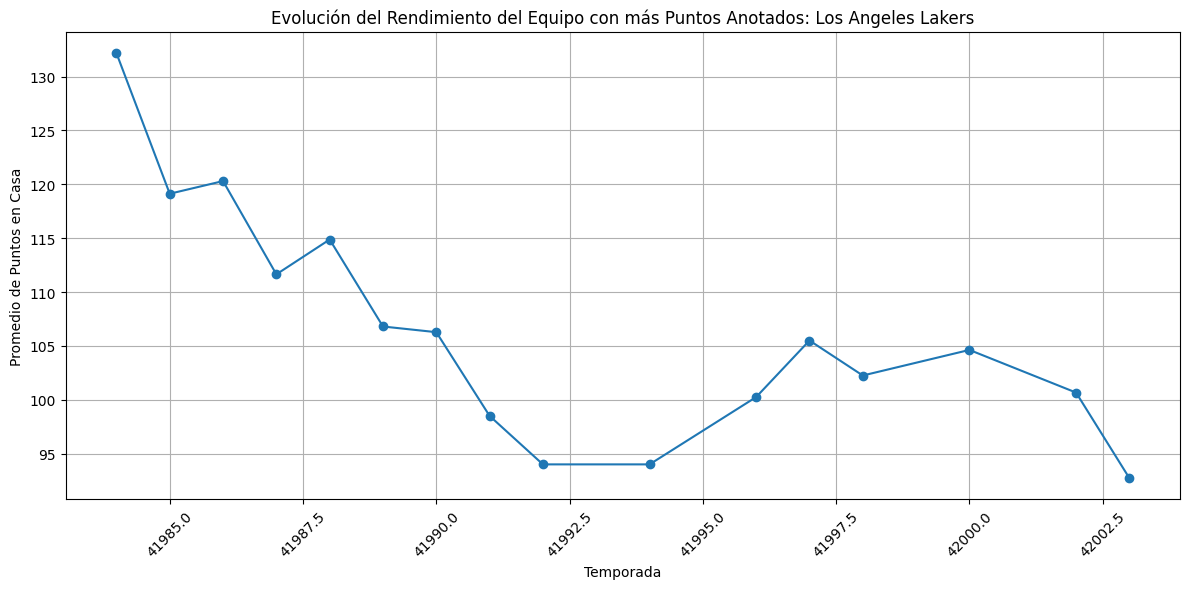

In [145]:
# Identificar el equipo con más puntos anotados en total
# # Filtrar los datos para ese equipo y agrupar por temporada
# # Graficar la evolución del rendimiento del equipo

team_total_points = games_playoffs.groupby('team_name_home')['pts_home'].sum()
best_team = team_total_points.idxmax()

best_team_performance = games_playoffs[games_playoffs['team_name_home'] == best_team].groupby('season_id')['pts_home'].mean()

plt.figure(figsize=(12, 6))
plt.plot(best_team_performance.index, best_team_performance.values, marker='o')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Puntos en Casa')
plt.title(f'Evolución del Rendimiento del Equipo con más Puntos Anotados: {best_team}')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Sección 5: Identificación del Mejor Jugador y Análisis Específico
Ahora vamos a centrarnos en identificar al mejor jugador y analizar su rendimiento a lo largo de las temporadas.

3. Identificación del Jugador con Más Puntos Anotados
Primero identificamos al jugador que ha anotado más puntos en los Playoffs y luego analizamos su evolución.

In [146]:
# Agrupar por jugador y sumar los puntos anotados
# Mostrar el jugador con más puntos anotados en los Playoffs

player_total_points = player_game_stats.groupby('person_id')['pts_home'].sum()

player_with_most_points_id = player_total_points.idxmax()

player_with_most_points_name = players_df[players_df['person_id'] == player_with_most_points_id][['first_name', 'last_name']].values[0]

print(f"El jugador con más puntos anotados en los Playoffs es: {player_with_most_points_name[0]} {player_with_most_points_name[1]} (ID: {player_with_most_points_id})")

El jugador con más puntos anotados en los Playoffs es: Rawle Alkins (ID: 1628959)


4. Evolución del Rendimiento del Mejor Jugador
Analizamos cómo ha cambiado el rendimiento del jugador con más puntos anotados a lo largo de los años.

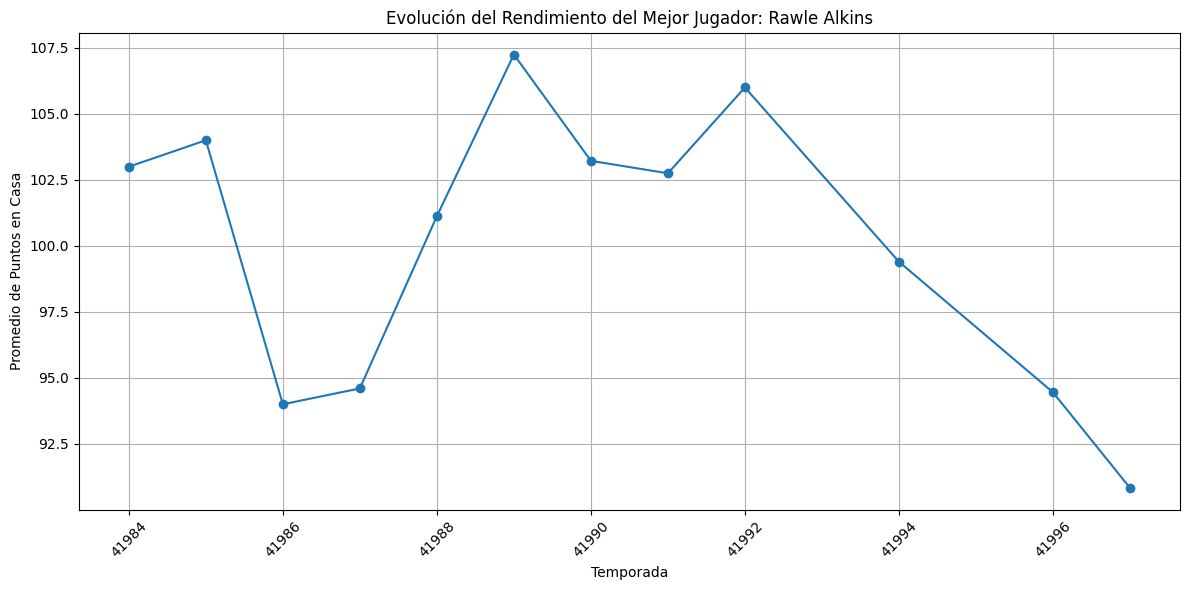

In [147]:
player_performance = player_game_stats[player_game_stats['person_id'] == player_with_most_points_id].groupby('season_id')['pts_home'].mean()

plt.figure(figsize=(12, 6))
plt.plot(player_performance.index, player_performance.values, marker='o')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Puntos en Casa')
plt.title(f'Evolución del Rendimiento del Mejor Jugador: {player_with_most_points_name[0]} {player_with_most_points_name[1]}')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5. Comparación entre Jugadores (Puntos por Partido)
Realizamos una comparación entre los jugadores para ver quiénes han sido los más efectivos en términos de puntos anotados por partido.

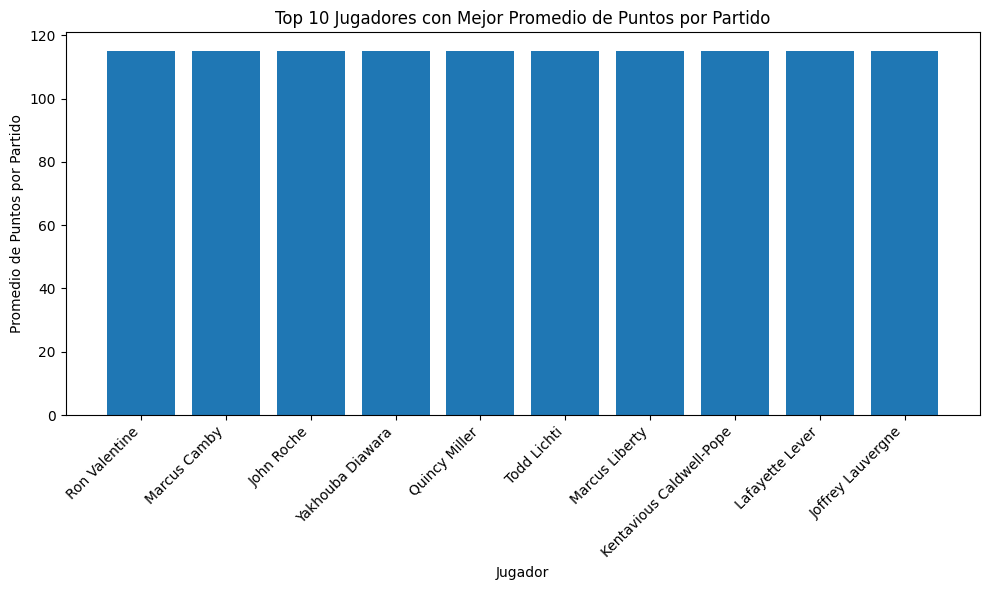

In [148]:
player_avg_points = player_game_stats.groupby('person_id')['pts_home'].mean()

top_players = player_avg_points.sort_values(ascending=False)

top_10_players = top_players.head(10)

# Obtener los nombres de los jugadores
player_names = []
for player_id in top_10_players.index:
  player_name = players_df[players_df['person_id'] == player_id][['first_name', 'last_name']].values
  if len(player_name) > 0:
    player_names.append(f"{player_name[0][0]} {player_name[0][1]}")
  else:
    player_names.append("Unknown")

# Graficar los 10 jugadores con mejor promedio de puntos por partido
plt.figure(figsize=(10, 6))
plt.bar(player_names, top_10_players.values)
plt.xlabel('Jugador')
plt.ylabel('Promedio de Puntos por Partido')
plt.title('Top 10 Jugadores con Mejor Promedio de Puntos por Partido')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()
plt.show()

6. Desempeño de un Jugador Específico
Podemos enfocarnos en un jugador en particular (puedes reemplazar el ID por el jugador que te mas puntos tenga) para analizar su rendimiento a lo largo del tiempo.
* Filtre person_id con el id específico
* Agrupe puntos por id de temporada.
* Analice el rendimiento del Jugador
* Busque en la base de datos la columna la columna first_name_x	last_name_x el person_id que le dio

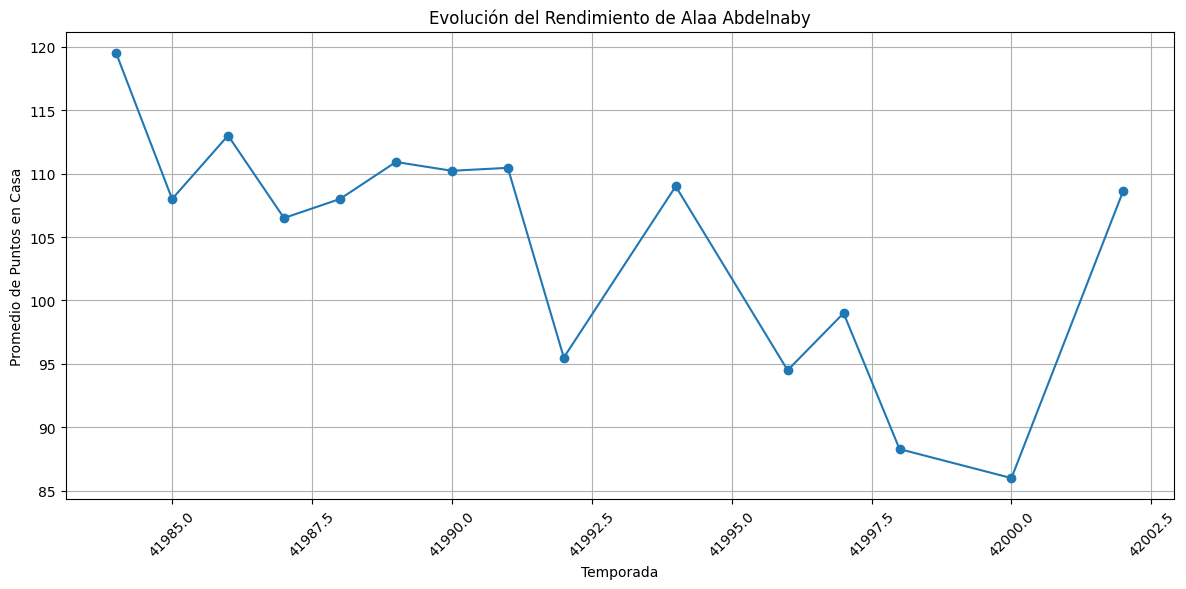

In [149]:
# Especificar el ID del jugador que queremos analizar (76001)
# Filtrar los datos para ese jugador y agrupar por temporada
# Graficar el rendimiento de ese jugador a lo largo de las temporadas
player_id_to_analyze = 76001

player_performance = player_game_stats[player_game_stats['person_id'] == player_id_to_analyze].groupby('season_id')['pts_home'].mean()

plt.figure(figsize=(12, 6))
plt.plot(player_performance.index, player_performance.values, marker='o')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Puntos en Casa')

player_name = players_df[players_df['person_id'] == player_id_to_analyze][['first_name', 'last_name']].values
if len(player_name) > 0:
  plt.title(f'Evolución del Rendimiento de {player_name[0][0]} {player_name[0][1]}')
else:
  plt.title(f'Evolución del Rendimiento del Jugador (ID: {player_id_to_analyze})')

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

8. Relación entre el Tiempo de Experiencia
`"season_exp"` y los Puntos Anotados `pts_home` Finalmente, analizamos si hay una relación entre el tiempo de experiencia de un jugador y su rendimiento en los Playoffs.
* Haga un groupby
* Haga una Grafica de serie de tiempo
* Analice: ¿Los jugadores con más años de experiencia tienden a anotar más puntos en los Playoffs?

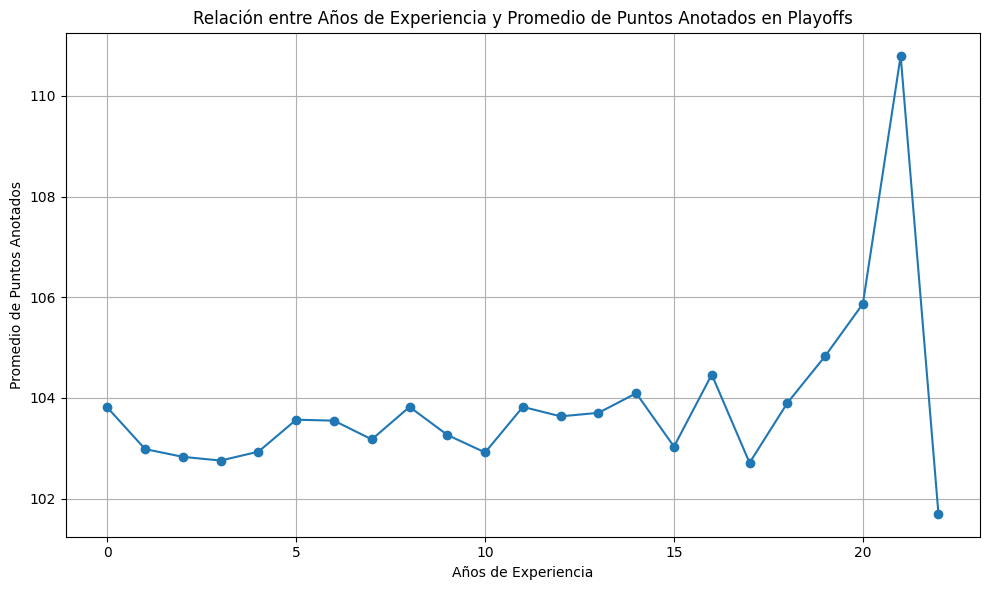

In [150]:

player_experience_points = player_game_stats.groupby('season_exp')['pts_home'].mean()

plt.figure(figsize=(10, 6))
plt.plot(player_experience_points.index, player_experience_points.values, marker='o')
plt.xlabel('Años de Experiencia')
plt.ylabel('Promedio de Puntos Anotados')
plt.title('Relación entre Años de Experiencia y Promedio de Puntos Anotados en Playoffs')
plt.grid(True)
plt.tight_layout()
plt.show()

* Juagador es:

## SECCION 7 : Preguntas de Negocio

1. ¿Qué factores crees que han influido en la evolución del rendimiento del mejor equipo a lo largo de los años?

 La evolución del rendimiento del mejor equipo a lo largo de los años está influenciada por una combinación de factores relacionados con los jugadores, la estrategia del equipo, factores externos, y las reglas del juego.

2. Al observar el rendimiento del mejor jugador a lo largo del tiempo, ¿qué puedes inferir sobre su consistencia y su impacto en los Playoffs? ¿Qué harías como entrenador para mantener o mejorar su rendimiento?

 El mejor jugador muestra consistencia con fluctuaciones, impactando los playoffs en ciertos años. Como entrenador, monitorearía su rendimiento, adaptaría entrenamientos, gestionaría su carga, lo motivaría y adaptaría las tácticas del equipo a sus fortalezas para mantener/mejorar su rendimiento.

3. ¿Qué papel crees que juegan las posiciones de los jugadores en el éxito de un equipo en los Playoffs? ¿Hay alguna posición que consideres clave para aumentar las probabilidades de victoria?